TITANIC DATASET

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [153]:
data = pd.read_csv('titanic.csv')

In [154]:
data.columns
data.shape
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [155]:
# Drop unnecessary features like PassengerId,Name
data.drop(columns=['PassengerId','Name'], inplace=True)

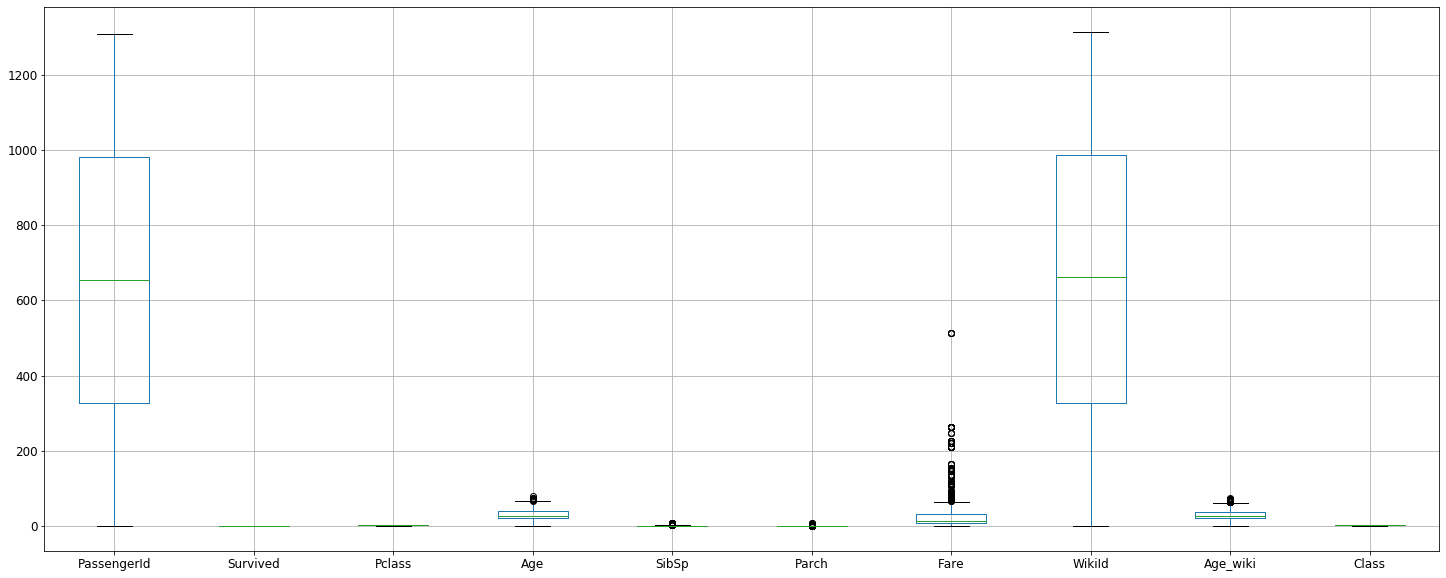

In [106]:
data.groupby('Pclass')['Fare'].mean()
data.boxplot(figsize=(25,10),fontsize='large')

In [157]:
# SInce there are many outliers in fare we'll use median for imputation
medm =data.groupby('Pclass')['Fare'].median()[3]
data['Fare'].fillna(value=medm,inplace=True)

In [158]:
# Since Pclass values &Class value are same.  Drop Class
data.drop('Class',axis=1,inplace=True)


In [159]:
# Hometown, Boarded & Destination doesn't have any impact on survival rate. Drop these columns
data.drop(['Hometown','Boarded','Destination'],inplace=True,axis=1)

In [162]:
#plt.plot(x_train['Survived'],)
data[['Age_wiki','Age']]
data.Age.loc[data.Age.isna()] = data.Age_wiki

In [163]:
data.Age.loc[data.Age.isnull()]= data.Age.median()
#x_train.boxplot(figsize=(15,20))

In [164]:
most_frequent = data.Embarked.value_counts().keys()[0]
data.Embarked.fillna(value=most_frequent,inplace=True)

In [166]:
data['Survived'] = data['Survived'].astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [167]:
#x_train.Survived.plot(kind='hist')
#plt.hist(x_train['Wiki_id'])
data.drop(['Name_wiki','Age_wiki','WikiId','Body','Lifeboat'],inplace=True,axis=1)

In [169]:
data.drop(['Cabin'],inplace=True,axis=1)

In [171]:
data.drop(['Ticket'],inplace=True,axis=1)

In [172]:
data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

Visualisation

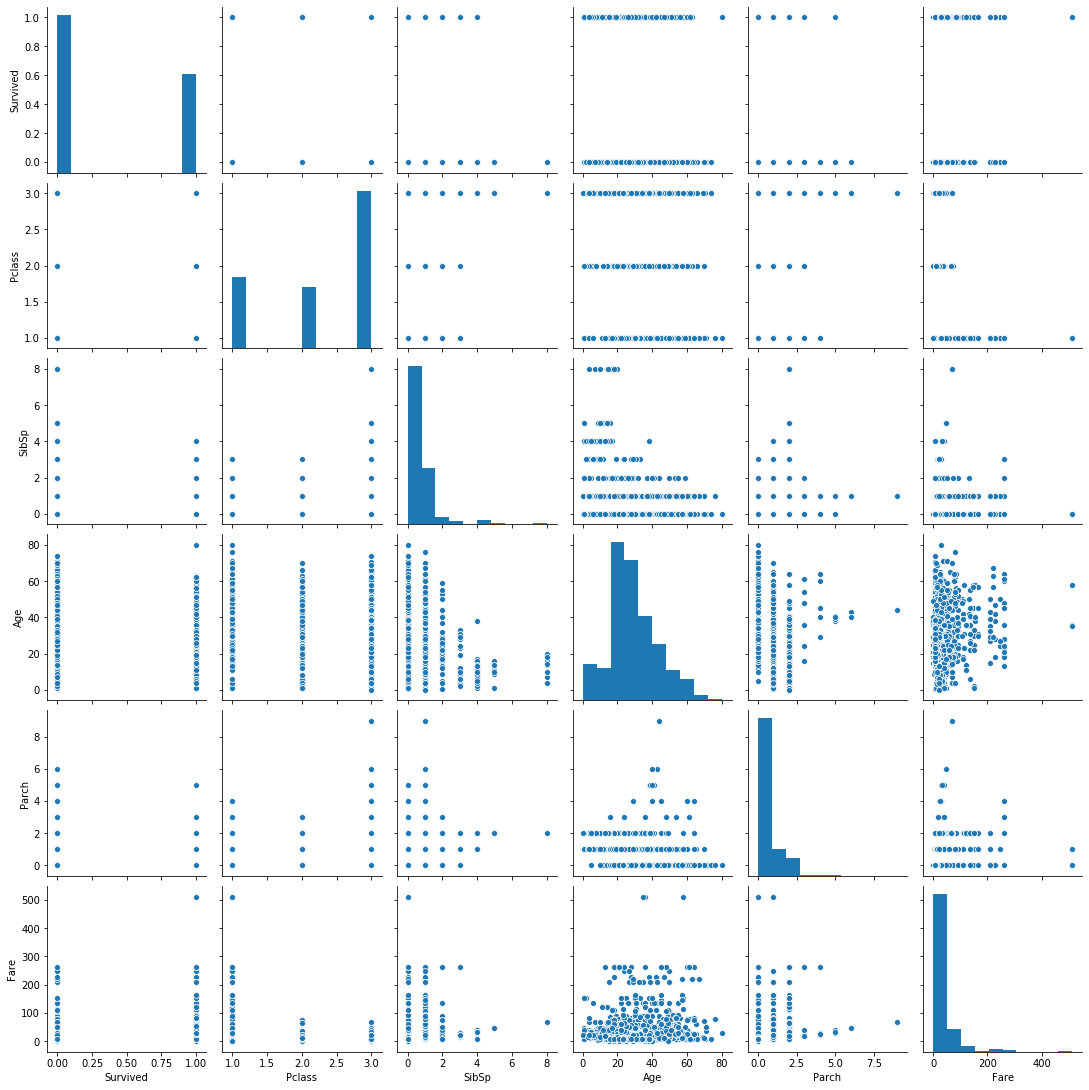

In [173]:
sns.pairplot(data[['Survived','Pclass','SibSp','Age','Parch','Fare']])

In [174]:
data =pd.get_dummies(data,columns=['Sex','Embarked'],drop_first=True)
data.head()

Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0       0.0       3  22.0      1      0   7.2500         1           0   
1       1.0       1  38.0      1      0  71.2833         0           0   
2       1.0       3  26.0      0      0   7.9250         0           0   
3       1.0       1  35.0      1      0  53.1000         0           0   
4       0.0       3  35.0      0      0   8.0500         1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [177]:
x = data[data['Survived'].notnull()]
x_test = data[data.Survived.isnull()]

In [179]:
x.shape, x_test.shape

((891, 9), (418, 9))

In [ ]:
y = x.Survived
x.drop(['Survived'],inplace=True,axis=1)

In [185]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [189]:
x_train,x_valid,y_train,y_valid = train_test_split(x,y,random_state=0,stratify=y)

In [191]:
lreg = LogisticRegression().fit(x_train,y_train)
lreg.score(x_train,y_train), lreg.score(x_valid,y_valid)

(0.8098802395209581, 0.8071748878923767)

In [193]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_valid,lreg.predict(x_valid))

array([[123,  14],
       [ 29,  57]], dtype=int64)

In [199]:
classification_report(y_valid,lreg.predict(x_valid),digits=2,labels=[0,1])

'              precision    recall  f1-score   support\n\n           0       0.81      0.90      0.85       137\n           1       0.80      0.66      0.73        86\n\n    accuracy                           0.81       223\n   macro avg       0.81      0.78      0.79       223\nweighted avg       0.81      0.81      0.80       223\n'

In [200]:
data.corr()

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.338481 -0.057323 -0.035322  0.081629  0.257307   
Pclass     -0.338481  1.000000 -0.417715  0.060832  0.018322 -0.558740   
Age        -0.057323 -0.417715  1.000000 -0.246417 -0.123258  0.181888   
SibSp      -0.035322  0.060832 -0.246417  1.000000  0.373587  0.160388   
Parch       0.081629  0.018322 -0.123258  0.373587  1.000000  0.221668   
Fare        0.257307 -0.558740  0.181888  0.160388  0.221668  1.000000   
Sex_male   -0.543351  0.124617  0.056668 -0.109609 -0.213125 -0.185744   
Embarked_Q  0.003650  0.230491 -0.085617 -0.048678 -0.100943 -0.129922   
Embarked_S -0.149683  0.091320  0.005758  0.073709  0.071881 -0.170123   

            Sex_male  Embarked_Q  Embarked_S  
Survived   -0.543351    0.003650   -0.149683  
Pclass      0.124617    0.230491    0.091320  
Age         0.056668   -0.085617    0.005758  
SibSp      -0.109609   -0.048678    0.073709  
Parch      -0.213125   -0.100943    0.071881  
Fare       -0.185744   -0.129922   -0.170123  
Sex_male    1.000000   -0.088651    0.115193  
Embarked_Q -0.088651    1.000000   -0.491656  
Embarked_S  0.115193   -0.491656    1.000000

In [204]:
data.corr()

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.338481 -0.057323 -0.035322  0.081629  0.257307   
Pclass     -0.338481  1.000000 -0.417715  0.060832  0.018322 -0.558740   
Age        -0.057323 -0.417715  1.000000 -0.246417 -0.123258  0.181888   
SibSp      -0.035322  0.060832 -0.246417  1.000000  0.373587  0.160388   
Parch       0.081629  0.018322 -0.123258  0.373587  1.000000  0.221668   
Fare        0.257307 -0.558740  0.181888  0.160388  0.221668  1.000000   
Sex_male   -0.543351  0.124617  0.056668 -0.109609 -0.213125 -0.185744   
Embarked_Q  0.003650  0.230491 -0.085617 -0.048678 -0.100943 -0.129922   
Embarked_S -0.149683  0.091320  0.005758  0.073709  0.071881 -0.170123   

            Sex_male  Embarked_Q  Embarked_S  
Survived   -0.543351    0.003650   -0.149683  
Pclass      0.124617    0.230491    0.091320  
Age         0.056668   -0.085617    0.005758  
SibSp      -0.109609   -0.048678    0.073709  
Parch      -0.213125   -0.100943    0.071881  
Fare       -0.185744   -0.129922   -0.170123  
Sex_male    1.000000   -0.088651    0.115193  
Embarked_Q -0.088651    1.000000   -0.491656  
Embarked_S  0.115193   -0.491656    1.000000

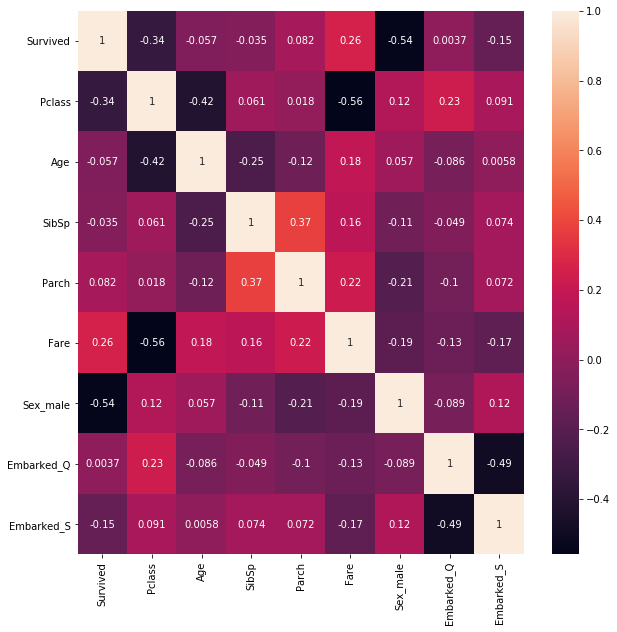

In [203]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [211]:
dff = x.assign(const=1)
[variance_inflation_factor()]
vif = pd.DataFrame([variance_inflation_factor(dff.values,i) for i in range(dff.shape[1])],index=dff.columns)
vif

0
Pclass       1.828432
Age          1.324763
SibSp        1.321759
Parch        1.330994
Fare         1.648999
Sex_male     1.125663
Embarked_Q   1.490202
Embarked_S   1.469908
const       33.875633

In [212]:
vif.reset_index(inplace=True)
vif.columns = ['col','val']
vif

col        val
0      Pclass   1.828432
1         Age   1.324763
2       SibSp   1.321759
3       Parch   1.330994
4        Fare   1.648999
5    Sex_male   1.125663
6  Embarked_Q   1.490202
7  Embarked_S   1.469908
8       const  33.875633

In [214]:
vif.sort_values(by='val')

col        val
5    Sex_male   1.125663
2       SibSp   1.321759
1         Age   1.324763
3       Parch   1.330994
7  Embarked_S   1.469908
6  Embarked_Q   1.490202
4        Fare   1.648999
0      Pclass   1.828432
8       const  33.875633

In [216]:
data.corr()['Survived']

Survived      1.000000
Pclass       -0.338481
Age          -0.057323
SibSp        -0.035322
Parch         0.081629
Fare          0.257307
Sex_male     -0.543351
Embarked_Q    0.003650
Embarked_S   -0.149683
Name: Survived, dtype: float64

In [218]:
from sklearn.ensemble import RandomForestClassifier
rr = RandomForestClassifier(n_estimators=70).fit(x_train,y_train)
rr.score(x_train,y_train) , rr.score(x_valid,y_valid)

(0.9865269461077845, 0.7847533632286996)

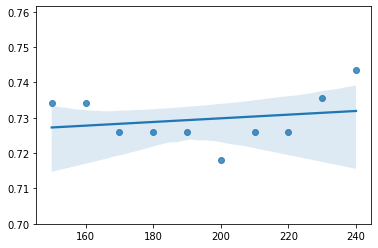

In [231]:
from sklearn.metrics import f1_score
sc = []
li = [x for x in range(150,250,10)]
for i in li:
    rr2 = RandomForestClassifier(n_estimators=i,random_state=0).fit(x_train,y_train)
    sc.append(f1_score(y_valid,rr2.predict(x_valid)))
sns.regplot(li,sc)

In [221]:
confusion_matrix(y_valid,rr.predict(x_valid))

array([[119,  18],
       [ 30,  56]], dtype=int64)

In [229]:
Submission = rr.predict(x_test)
Submission.to_csv('Result.csv',index=False)